In [ ]:
!pwd
!wget https://dlcdn.apache.org/spark/spark-3.3.2/spark-3.3.2-bin-hadoop3.tgz

/content
--2023-04-06 10:44:20--  https://dlcdn.apache.org/spark/spark-3.3.2/spark-3.3.2-bin-hadoop3.tgz
Resolving dlcdn.apache.org (dlcdn.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to dlcdn.apache.org (dlcdn.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 299360284 (285M) [application/x-gzip]
Saving to: ‘spark-3.3.2-bin-hadoop3.tgz’

spark-3.3.2-bin-had 100%[===================>] 285.49M   151MB/s    in 1.9s    

2023-04-06 10:44:22 (151 MB/s) - ‘spark-3.3.2-bin-hadoop3.tgz’ saved [299360284/299360284]



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/spark-3.3.2-bin-hadoop3
!pip install findspark


ls: cannot access '/content/spark-3.3.2-bin-hadoop3': No such file or directory
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://dlcdn.apache.org/spark/spark-3.3.2/spark-3.3.2-bin-hadoop3.tgz
!tar -xvf spark-3.3.2-bin-hadoop3.tgz
!pip install -q findspark

spark-3.3.2-bin-hadoop3/
spark-3.3.2-bin-hadoop3/LICENSE
spark-3.3.2-bin-hadoop3/NOTICE
spark-3.3.2-bin-hadoop3/R/
spark-3.3.2-bin-hadoop3/R/lib/
spark-3.3.2-bin-hadoop3/R/lib/SparkR/
spark-3.3.2-bin-hadoop3/R/lib/SparkR/DESCRIPTION
spark-3.3.2-bin-hadoop3/R/lib/SparkR/INDEX
spark-3.3.2-bin-hadoop3/R/lib/SparkR/Meta/
spark-3.3.2-bin-hadoop3/R/lib/SparkR/Meta/Rd.rds
spark-3.3.2-bin-hadoop3/R/lib/SparkR/Meta/features.rds
spark-3.3.2-bin-hadoop3/R/lib/SparkR/Meta/hsearch.rds
spark-3.3.2-bin-hadoop3/R/lib/SparkR/Meta/links.rds
spark-3.3.2-bin-hadoop3/R/lib/SparkR/Meta/nsInfo.rds
spark-3.3.2-bin-hadoop3/R/lib/SparkR/Meta/package.rds
spark-3.3.2-bin-hadoop3/R/lib/SparkR/Meta/vignette.rds
spark-3.3.2-bin-hadoop3/R/lib/SparkR/NAMESPACE
spark-3.3.2-bin-hadoop3/R/lib/SparkR/R/
spark-3.3.2-bin-hadoop3/R/lib/SparkR/R/SparkR
spark-3.3.2-bin-hadoop3/R/lib/SparkR/R/SparkR.rdb
spark-3.3.2-bin-hadoop3/R/lib/SparkR/R/SparkR.rdx
spark-3.3.2-bin-hadoop3/R/lib/SparkR/doc/
spark-3.3.2-bin-hadoop3/R/lib/Spar

In [ ]:
import os
os.environ["SPARK_HOME"] = "/content/spark-3.3.2-bin-hadoop3"

import findspark
findspark.init()

In [ ]:
from pyspark.sql import SparkSession

In [ ]:
!pip install -q findspark

In [12]:
# A tutorial for this file is available at www.relataly.com

# Import SparkSession from pyspark.sql
from pyspark.sql import SparkSession
from pyspark.sql.types import StringType
from pyspark.sql.functions import col, isnan, when, count, udf, year, month, to_date, mean
import pyspark.sql.functions as F
import seaborn as sns
import matplotlib.pyplot as plt

# Create my_spark
spark = SparkSession.builder.getOrCreate()
print(spark)

In [13]:
# Read File A
spark_weather_df_a = spark.read \
    .option("header", False) \
    .option("sep", ",") \
    .option("inferSchema", True) \
    .csv(path=f'/content/zurich-weather-part-a.csv')
    
spark_weather_df_a.printSchema()
spark_weather_df_a.describe().show()

root
 |-- _c0: integer (nullable = true)
 |-- _c1: timestamp (nullable = true)
 |-- _c2: double (nullable = true)
 |-- _c3: double (nullable = true)
 |-- _c4: double (nullable = true)
 |-- _c5: double (nullable = true)
 |-- _c6: double (nullable = true)
 |-- _c7: double (nullable = true)
 |-- _c8: double (nullable = true)
 |-- _c9: string (nullable = true)

+-------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+----+
|summary|               _c0|               _c2|              _c3|               _c4|               _c5|               _c6|               _c7|               _c8| _c9|
+-------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+----+
|  count|             15383|             15362|            15383|             15242|               884|               896|               896| 

In [14]:
# Read File B
spark_weather_df_b = spark.read \
    .option("header", False) \
    .option("sep", ",") \
    .option("inferSchema", True) \
    .csv(path=f'/content/zurich-weather-part-b.csv')

spark_weather_df_b.printSchema()
spark_weather_df_b.describe().show()

root
 |-- _c0: integer (nullable = true)
 |-- _c1: timestamp (nullable = true)
 |-- _c2: double (nullable = true)
 |-- _c3: double (nullable = true)

+-------+------------------+------------------+-----------------+
|summary|               _c0|               _c2|              _c3|
+-------+------------------+------------------+-----------------+
|  count|             15383|             15374|            15368|
|   mean|182.63121627770917|13.705762976453707|6.066957313898991|
| stddev|105.73420482794725| 8.830919147315488|6.620985806040896|
|    min|                 0|             -15.2|            -20.8|
|    max|               366|              36.0|             22.5|
+-------+------------------+------------------+-----------------+



In [15]:
# Drop unused Columns
spark_weather_df_a = spark_weather_df_a.drop("_c0")
spark_weather_df_b = spark_weather_df_b.drop("_c0")

In [16]:
# method A: rename individual columns
spark_weather_df_b_renamed = spark_weather_df_b.withColumnRenamed("_c1", "date") \
    .withColumnRenamed("_c2", "max_temp") \
    .withColumnRenamed("_c3", "min_temp") 
        
# method B: rename multiple columns at once   
def rename_multiple_columns(df, columns):
    if isinstance(columns, dict):
        return df.select(*[F.col(col_name).alias(columns.get(col_name, col_name)) for col_name in df.columns])
    else:
        raise ValueError("columns need to be in dict format {'existing_name_a':'new_name_a', 'existing_name_b':'new_name_b'}")

dict_columns = {"_c1": "date2", 
                "_c2": "avg_temp", 
                "_c3": "precip",
                "_c4": "snow",
                "_c5": "wind_dir",
                "_c6": "wind_speed",
                "_c7": "wind_power",
                "_c8": "air_pressure",
                "_c9": "sunny_hours",}
spark_weather_df_a_renamed = rename_multiple_columns(spark_weather_df_a , dict_columns)

# Join the dataframes
spark_weather_df = spark_weather_df_a_renamed.join(spark_weather_df_b_renamed, spark_weather_df_a_renamed.date2 == spark_weather_df_b_renamed.date, "inner")

In [17]:
def quick_overview(df):
   # display the spark dataframe
   print("FIRST RECORDS")
   print(df.limit(2).sort(col("date"), ascending=True).toPandas())

   # count null values
   print("COUNT NULL VALUES")
   print(df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c, y in df.dtypes if y in ["double", "float"]]
      ).toPandas())

   # print("DESCRIBE STATISTICS")
   # print(df.describe().toPandas())
   # # Alternatively to get the max value, we could use max_value = df.agg({"precipitation": "max"}).collect()[0][0]

   # check for dublicates
   dublicates = df.groupby(spark_weather_df.date) \
    .count() \
    .where('count > 1') \
    .limit(5).toPandas()
   print(dublicates)

   # print schema
   print("PRINT SCHEMA")
   print(df.printSchema())

quick_overview(spark_weather_df)

FIRST RECORDS
       date2  avg_temp  precip  snow  wind_dir  wind_speed  wind_power  \
0 1979-01-01      -5.3     1.0   0.0       NaN         NaN         NaN   
1 1979-01-02     -10.0     1.7  10.0       NaN         NaN         NaN   

   air_pressure sunny_hours       date  max_temp  min_temp  
0           NaN        None 1979-01-01      -2.5     -12.2  
1           NaN        None 1979-01-02      -4.2     -12.2  
COUNT NULL VALUES
   avg_temp  precip  snow  wind_dir  wind_speed  wind_power  air_pressure  \
0        21       0   143     14577       14565       14565         14565   

   max_temp  min_temp  
0         9        15  
        date  count
0 2003-01-01      4
1 1989-01-01      4
2 2017-01-01      4
3 1997-01-01      4
4 2004-01-01      4
PRINT SCHEMA
root
 |-- date2: timestamp (nullable = true)
 |-- avg_temp: double (nullable = true)
 |-- precip: double (nullable = true)
 |-- snow: double (nullable = true)
 |-- wind_dir: double (nullable = true)
 |-- wind_speed: double (nu

In [18]:
def quick_overview(df):
   # display the spark dataframe
   print("FIRST RECORDS")
   print(df.limit(2).sort(col("date"), ascending=True).toPandas())

   # count null values
   print("COUNT NULL VALUES")
   print(df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c, y in df.dtypes if y in ["double", "float"]]
      ).toPandas())

   # print("DESCRIBE STATISTICS")
   # print(df.describe().toPandas())
   # # Alternatively to get the max value, we could use max_value = df.agg({"precipitation": "max"}).collect()[0][0]

   # check for dublicates
   dublicates = df.groupby(spark_weather_df.date) \
    .count() \
    .where('count > 1') \
    .limit(5).toPandas()
   print(dublicates)

   # print schema
   print("PRINT SCHEMA")
   print(df.printSchema())

quick_overview(spark_weather_df)

FIRST RECORDS
       date2  avg_temp  precip  snow  wind_dir  wind_speed  wind_power  \
0 1979-01-01      -5.3     1.0   0.0       NaN         NaN         NaN   
1 1979-01-02     -10.0     1.7  10.0       NaN         NaN         NaN   

   air_pressure sunny_hours       date  max_temp  min_temp  
0           NaN        None 1979-01-01      -2.5     -12.2  
1           NaN        None 1979-01-02      -4.2     -12.2  
COUNT NULL VALUES
   avg_temp  precip  snow  wind_dir  wind_speed  wind_power  air_pressure  \
0        21       0   143     14577       14565       14565         14565   

   max_temp  min_temp  
0         9        15  
        date  count
0 2003-01-01      4
1 1989-01-01      4
2 2017-01-01      4
3 1997-01-01      4
4 2004-01-01      4
PRINT SCHEMA
root
 |-- date2: timestamp (nullable = true)
 |-- avg_temp: double (nullable = true)
 |-- precip: double (nullable = true)
 |-- snow: double (nullable = true)
 |-- wind_dir: double (nullable = true)
 |-- wind_speed: double (nu

In [29]:
# calculate mean values
avg = spark_weather_df.filter(spark_weather_df.avg_temp.isNotNull())\
    .select(mean(col('min_temp')).alias('mean_min'), 
            mean(col('max_temp')).alias('mean_max'), 
            mean(col('wind_speed')).alias('mean_wind')).collect()

mean_min = avg[0]['mean_min']
mean_max = avg[0]['mean_max']
mean_wind = avg[0]['mean_wind']

# replace na values with mean values
spark_weather_df = spark_weather_df \
    .na.fill(value=mean_min, subset=["min_temp"]) \
    .na.fill(value=mean_max, subset=["max_temp"]) \
    .na.fill(value=mean_wind, subset=["wind_speed"]) \
    .na.fill(value=0, subset=["snow"])

In [35]:
spark_cleaned_df = spark_weather_df.dropDuplicates() \
      .drop(col("date2"))\
      .withColumn("date", to_date(col("date"),"yyyy-MM-dd")) \
    .orderBy(col("date")) \
    .select(col("date"),col("avg_temp"),col("min_temp"),col("max_temp"),col("wind_speed"),col("snow"),col("precip")) # select columns

quick_overview(spark_cleaned_df)

FIRST RECORDS
         date  avg_temp  min_temp  max_temp  wind_speed  snow  precip
0  1979-01-01      -5.3     -12.2      -2.5    7.330333   0.0     1.0
1  1979-01-02     -10.0     -12.2      -4.2    7.330333  10.0     1.7
COUNT NULL VALUES
   avg_temp  min_temp  max_temp  wind_speed  snow  precip
0        21         0         0           0     0       0


AnalysisException: ignored

In [36]:
# More Infos on User Defined Functions: https://sparkbyexamples.com/pyspark/pyspark-udf-user-defined-function/
# create bucket column for temperature
def binner(min_temp, max_temp):
        if (min_temp is None) or (max_temp is None):
            return "unknown"
        else:
            if min_temp < -10:
                return "freezing cold"
            elif min_temp < -5:
                return "very cold"
            elif min_temp < 0:
                return "cold"
            elif max_temp < 10:
                return "normal"
            elif max_temp < 20:
                return "warm"
            elif max_temp < 30:
                return "hot"
            elif max_temp >= 30:
                return "very hot"
        return "normal"


udf_binner_temp = udf(binner, StringType() )
spark_cleaned_df = spark_cleaned_df.withColumn("temp_buckets", udf_binner_temp(col("min_temp"), col("max_temp")))
spark_cleaned_df.limit(10).toPandas()

,date,avg_temp,min_temp,max_temp,wind_speed,snow,precip,temp_buckets
0,1979-01-01,-5.3,-12.2,-2.5,7.330333,0.0,1.0,freezing cold
1,1979-01-02,-10.0,-12.2,-4.2,7.330333,10.0,1.7,freezing cold
2,1979-01-03,-5.8,-7.9,-3.9,7.330333,110.0,0.0,very cold
3,1979-01-04,-8.4,-10.5,-4.4,7.330333,100.0,0.0,freezing cold
4,1979-01-05,-10.0,-11.2,-7.5,7.330333,70.0,0.0,freezing cold
5,1979-01-06,-6.4,-10.1,-2.8,7.330333,50.0,0.0,freezing cold
6,1979-01-07,-3.8,-5.1,-2.9,7.330333,40.0,0.0,very cold
7,1979-01-08,-2.4,-4.5,1.4,7.330333,40.0,5.1,cold
8,1979-01-09,1.4,-0.4,3.8,7.330333,20.0,3.2,cold
9,1979-01-10,0.4,-1.4,2.8,7.330333,10.0,5.4,cold


In [37]:
# create new columns for bucket percipitation and for month and year
udf_binner_precip = udf(lambda x: "very rainy" if x > 50 else ("rainy" if x > 0 else "dry"), StringType())
spark_cleaned_df = spark_cleaned_df \
    .withColumn("precip_buckets", udf_binner_precip("precip")) \
    .withColumn("month", month(spark_cleaned_df.date)) \
    .withColumn("year", year(spark_cleaned_df.date)) 
spark_cleaned_df.limit(5).toPandas()

,date,avg_temp,min_temp,max_temp,wind_speed,snow,precip,temp_buckets,precip_buckets,month,year
0,1979-01-01,-5.3,-12.2,-2.5,7.330333,0.0,1.0,freezing cold,rainy,1,1979
1,1979-01-02,-10.0,-12.2,-4.2,7.330333,10.0,1.7,freezing cold,rainy,1,1979
2,1979-01-03,-5.8,-7.9,-3.9,7.330333,110.0,0.0,very cold,dry,1,1979
3,1979-01-04,-8.4,-10.5,-4.4,7.330333,100.0,0.0,freezing cold,dry,1,1979
4,1979-01-05,-10.0,-11.2,-7.5,7.330333,70.0,0.0,freezing cold,dry,1,1979


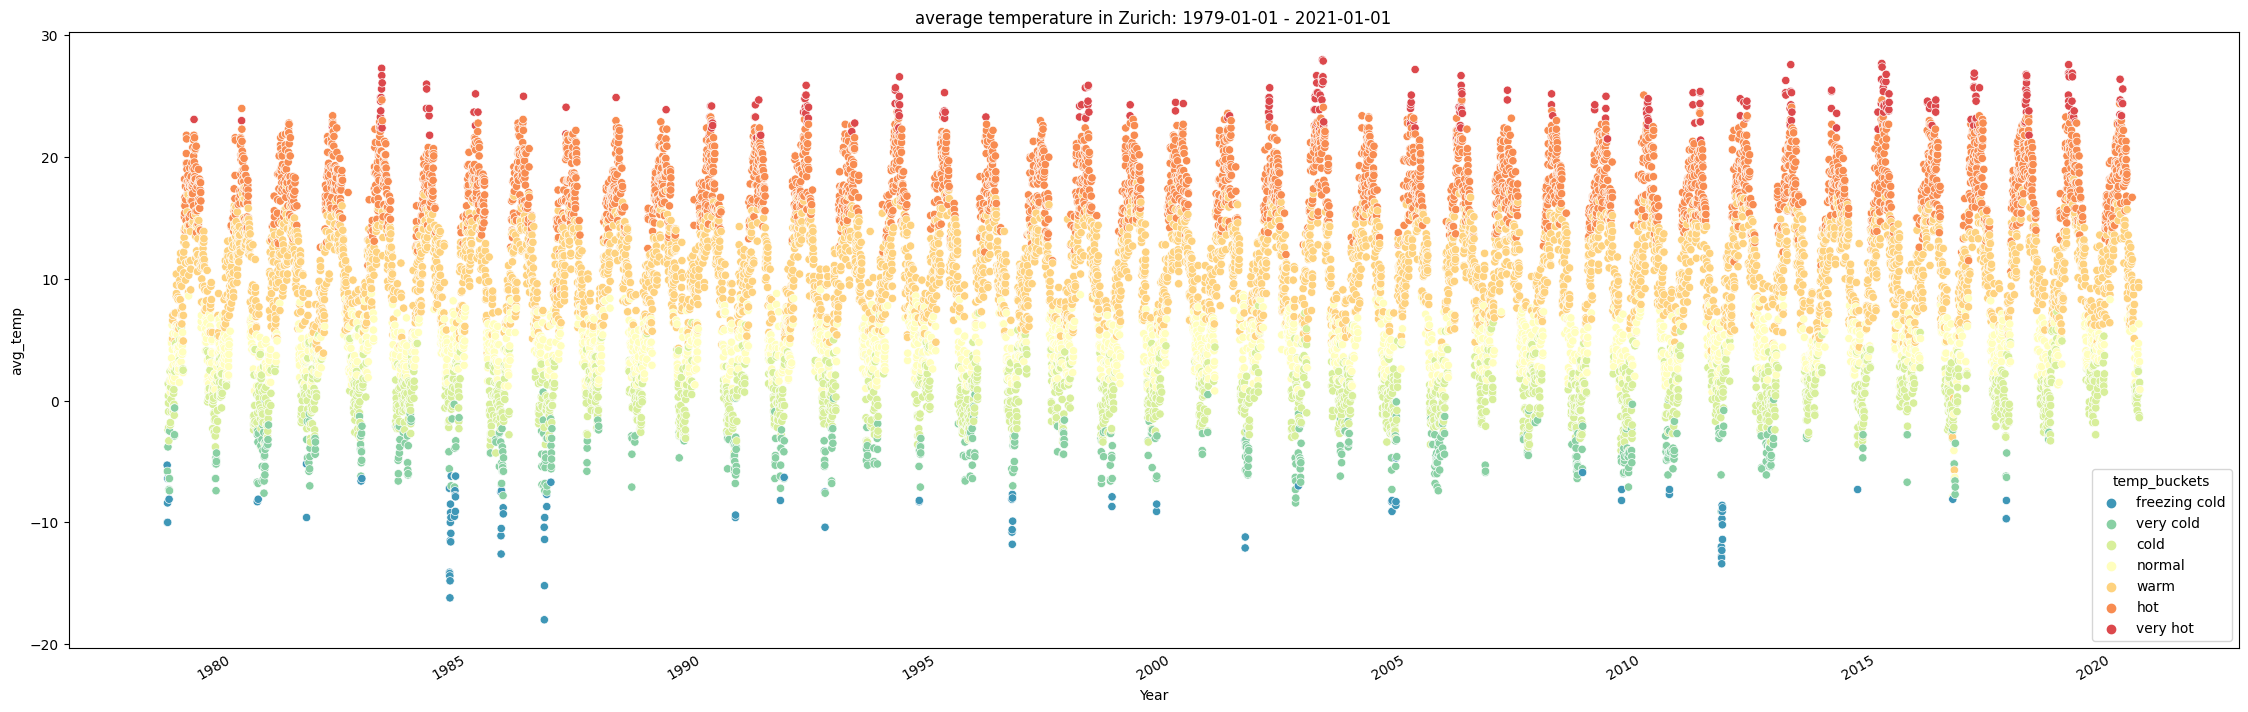

In [38]:
# set the dimensions for the scatterplot
fig, ax = plt.subplots(figsize=(28,8))
sns.scatterplot(hue="temp_buckets", y="avg_temp", x="date", data=spark_cleaned_df.toPandas(), palette="Spectral_r")

# plot formatting 
ax.tick_params(axis="x", rotation=30, labelsize=10, length=0)

# title formatting
mindate = str(spark_cleaned_df.agg({'date': 'min'}).collect()[0]['min(date)'])
maxdate = str(spark_cleaned_df.agg({'date': 'max'}).collect()[0]['max(date)'])
ax.set_title("average temperature in Zurich: " + mindate + " - " + maxdate)
plt.xlabel("Year")
plt.show()

<Axes: xlabel='year', ylabel='month'>

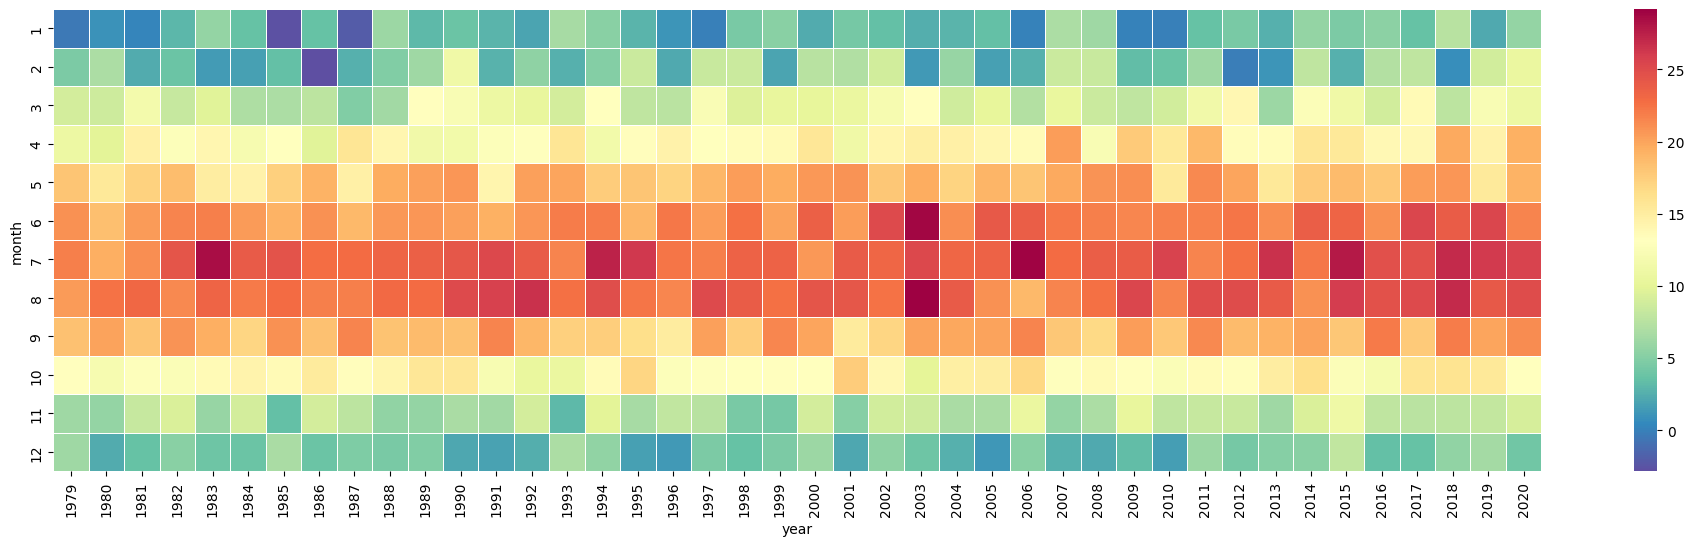

In [39]:
spark_cleaned_df_agg = spark_cleaned_df.select(col("year"),col("month"),col("max_temp")) \
    .filter(spark_cleaned_df.year < 2021)\
    .groupby(col("year"),col("month"))\
    .agg(mean("max_temp").alias("mean_max_temp")) \
    .orderBy(col("year")).toPandas()

plt.figure(figsize=(24,6))
avg_temp_df = spark_cleaned_df_agg.pivot("month", "year", "mean_max_temp")
sns.heatmap(avg_temp_df, cmap="Spectral_r", linewidths=.5)

Text(0.5, 1.0, 'min - max temperature seperated by month')

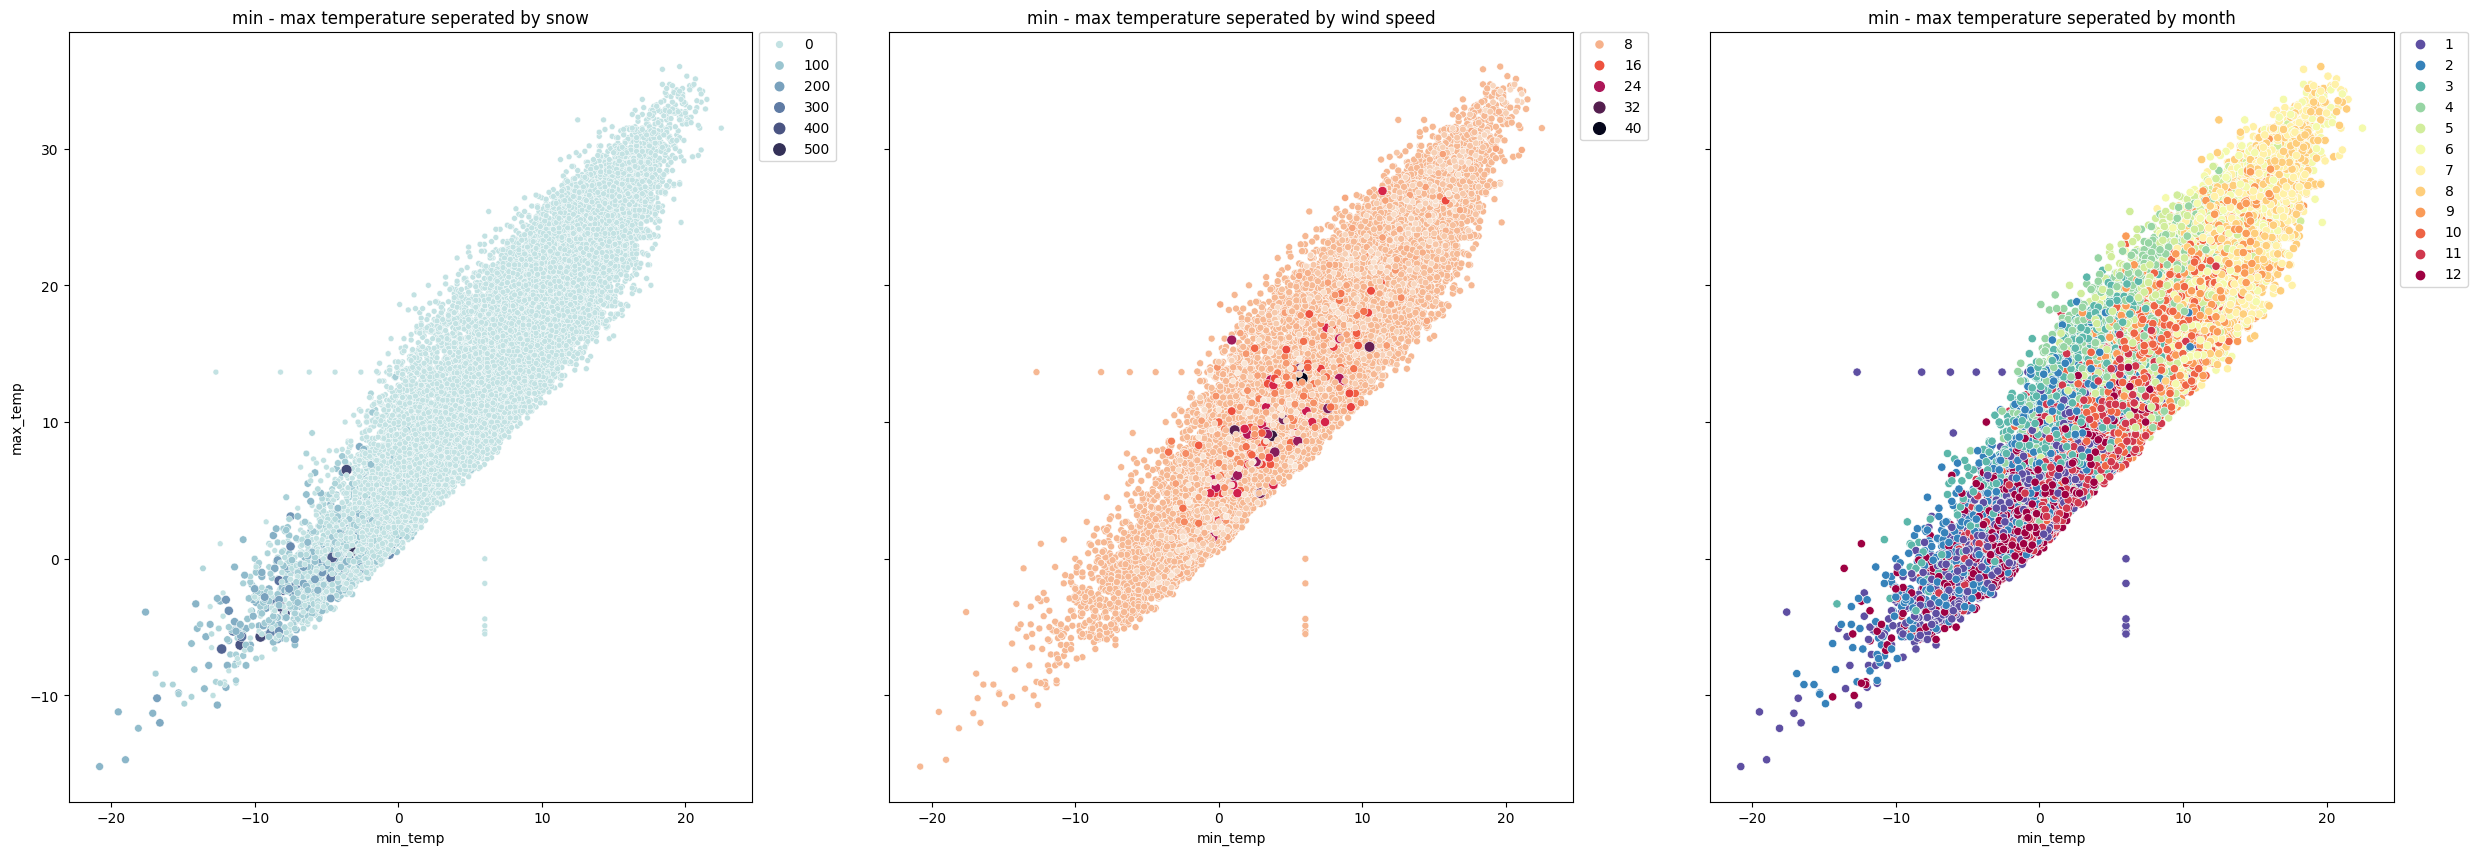

In [40]:
fig, axes= plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(30, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.2)

palette = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
sns.scatterplot(ax = axes[0], hue="snow", size="snow", y="max_temp", x="min_temp", data=spark_cleaned_df.toPandas(), alpha=1.0, palette=palette)
axes[0].legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
axes[0].set_title("min - max temperature seperated by snow")

sns.scatterplot(ax = axes[1], hue="wind_speed", size="wind_speed", y="max_temp", x="min_temp", data=spark_cleaned_df.toPandas(), alpha=1.0, palette='rocket_r')
axes[1].legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
axes[1].set_title("min - max temperature seperated by wind speed")

sns.scatterplot(ax = axes[2], hue="month", y="max_temp", x="min_temp", data=spark_cleaned_df.toPandas(), alpha=1.0, palette='Spectral_r', hue_norm=(1,12), legend="full")
axes[2].legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
axes[2].set_title("min - max temperature seperated by month")


   year  month  mean(avg_temp)  mean(max_temp)  mean(min_temp)
0  1979      5       19.180000       26.940000       12.900000
1  1979      6       19.200000       25.842857       14.385714
2  1979      7       20.828571       27.071429       15.357143
3  1979      8       20.200000       27.000000       14.216667
4  1979      9       19.000000       25.400000       13.700000


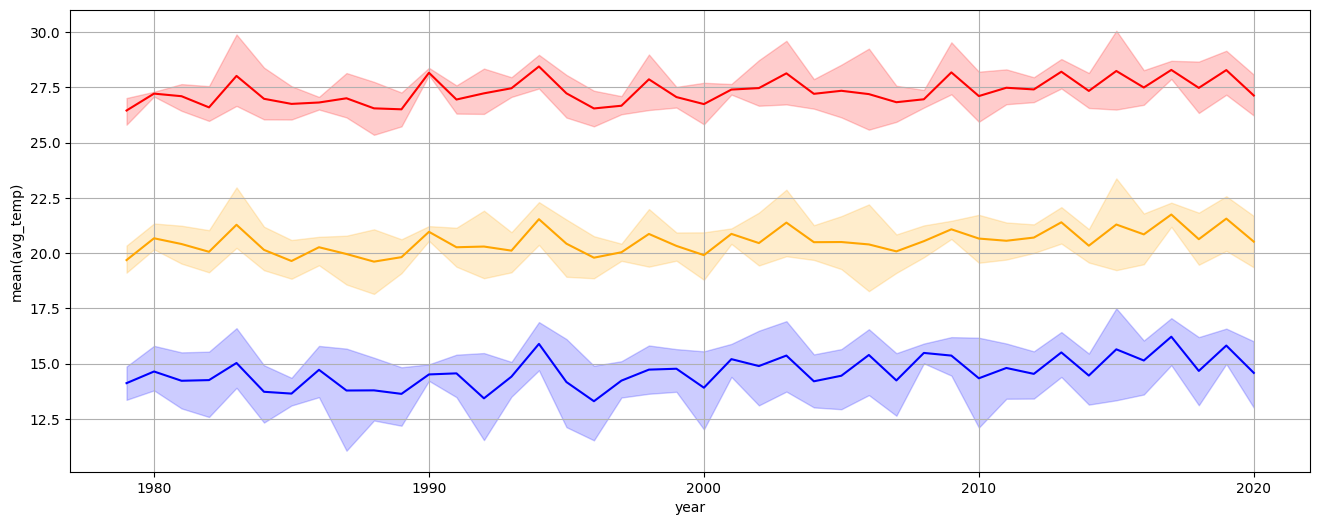

In [41]:
# Data Analysis using PySpark.SQL

# register the dataset as a temp view, so we can use sq
spark_cleaned_df.createOrReplaceTempView("waeather_data_temp_view")

# see how event numbers have evolved over years
events_over_years_df = spark.sql( \
        'SELECT year, month, mean(avg_temp), mean(max_temp), mean(min_temp) \
        FROM waeather_data_temp_view \
        WHERE max_temp > 25 \
        GROUP BY month, year \
        ORDER BY year, month')
print(events_over_years_df.limit(5).toPandas())

plt.figure(figsize=(16,6))
fig = sns.lineplot(y="mean(avg_temp)", x="year", data=events_over_years_df.toPandas(), color= "orange")
fig = sns.lineplot(y="mean(max_temp)", x="year", data=events_over_years_df.toPandas(), color= "red")
fig = sns.lineplot(y="mean(min_temp)", x="year", data=events_over_years_df.toPandas(), color= "blue")
plt.grid()
plt.show()


In [42]:
# Using PySpark standard functions
events_over_years_df = spark_cleaned_df\
    .filter(spark_cleaned_df.year < 2021)\
    .groupby(col("year"))\
    .agg(mean("avg_temp").alias("mean_avg_temp"), 
         mean("min_temp").alias("mean_min_temp"), 
         mean("max_temp").alias("mean_max_temp"))\
    .orderBy(col("year")).toPandas()

plt.figure(figsize=(15,6))

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>